# Python to DB Connection

In [1]:
#!pip install pymysql
#!pip install sqlalchemy

**Connection**

In [2]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Database configuration
host = '127.0.0.1'
user = 'root'
password = 'Nithinraja01!'
database = 'DMAProject'

connection = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

# Test connection
try:
    with connection.connect() as conn:
        print("Connection to the database was successful! \nSuccessfully Connected to DMAProject")
except Exception as e:
    print("Failed to connect to the database.")
    print("Error:", str(e))
    exit()

Connection to the database was successful! 
Successfully Connected to DMAProject


**All details from Employee table**

In [3]:
#Query1

query1 = "select * from employee"
results_df1 = pd.read_sql(query1, con=connection)
print(results_df1.head()) 

   EmployeeID        Name  Gender         DOB     PhoneNo  SkillType
0        1019  Monserrate    Male  2005-01-07  1035051233  Unskilled
1        1208        Orin  Female  1998-05-14  3659173895  Unskilled
2        1615        Tyra   Other  2019-10-26  5781517476  Unskilled
3        1816      Helena    Male  2014-12-07  4757839668  Unskilled
4        2228        Nash    Male  1996-05-14  1775598246    Skilled


**Scatter plot for Number of Maintenance assigned to each skilled employee**

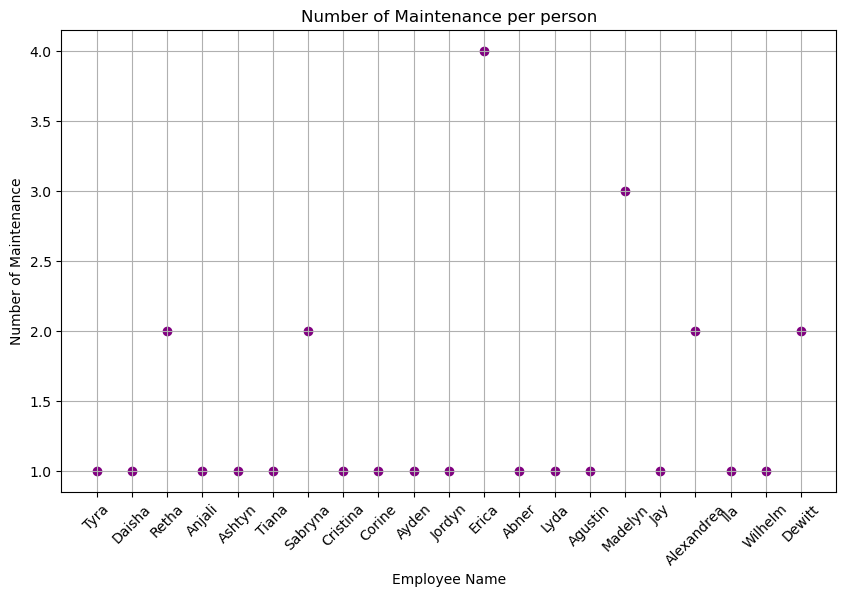

In [4]:
#Query2

query2 = """select Name, count(e.EmployeeID) as NumberOfMaintenance from employee e , maintenance m 
where e.EmployeeID = m.Employee_Incharge 
group by e.EmployeeID ;"""
results_df2 = pd.read_sql(query2, con=connection)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df2['Name'], results_df2['NumberOfMaintenance'], color = 'purple')
plt.grid(True)
plt.xlabel('Employee Name')
plt.ylabel('Number of Maintenance')
plt.title('Number of Maintenance per person')
plt.xticks(rotation=45)
plt.show()

**Bar chart of warehouse details where current stock current stock of 'any' warehouse capacity greater than 20000**

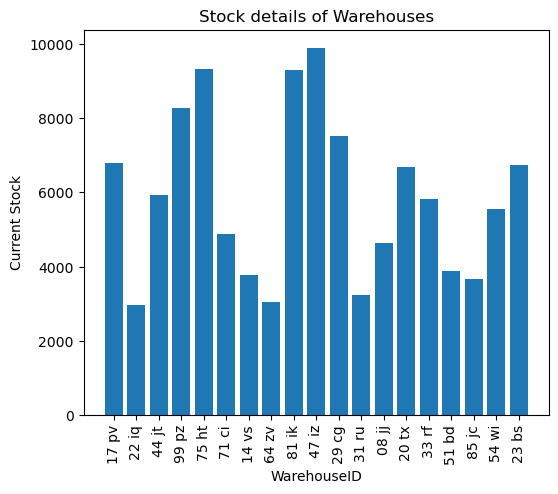

In [5]:
#Query4

query4 = '''Select WarehouseID, Capacity, CurrentStock, Location, Warehouse_productID from Warehouse
where CurrentStock > any (select CurrentStock from Warehouse where Capacity > 20000);'''
results_df4 = pd.read_sql(query4, con=connection)

plt.figure(figsize=(6, 5))
plt.bar(results_df4['WarehouseID'], results_df4['CurrentStock'])
plt.xlabel('WarehouseID')
plt.ylabel('Current Stock')
plt.title('Stock details of Warehouses')
plt.xticks(rotation=90)
plt.show()

**Bar chart Details of spares ordered where the current quantity of spares is less than 20**

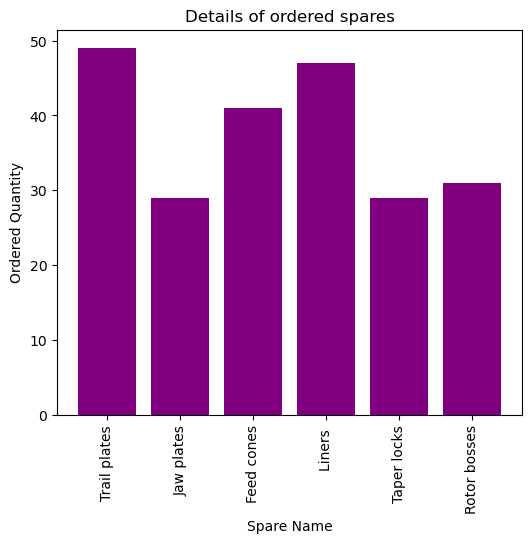

In [6]:
#Query5

query5 = '''select s.sparename, po.quantity from purchaseorder po, spares s 
where po.spareid = s.spareid and s.stock < 20;'''
results_df5 = pd.read_sql(query5, con=connection)

plt.figure(figsize=(6, 5))
plt.bar(results_df5['sparename'], results_df5['quantity'], color = 'purple')
plt.xlabel('Spare Name')
plt.ylabel('Ordered Quantity')
plt.title('Details of ordered spares')
plt.xticks(rotation=90)
plt.show()

**Pie chart to show Distribution of products in warehouse table contining product 'sand'**

   ProductID  TotalStock
0  701-Msand      9309.0
1  708-Msand      9892.0
2  801-Psand      7523.0


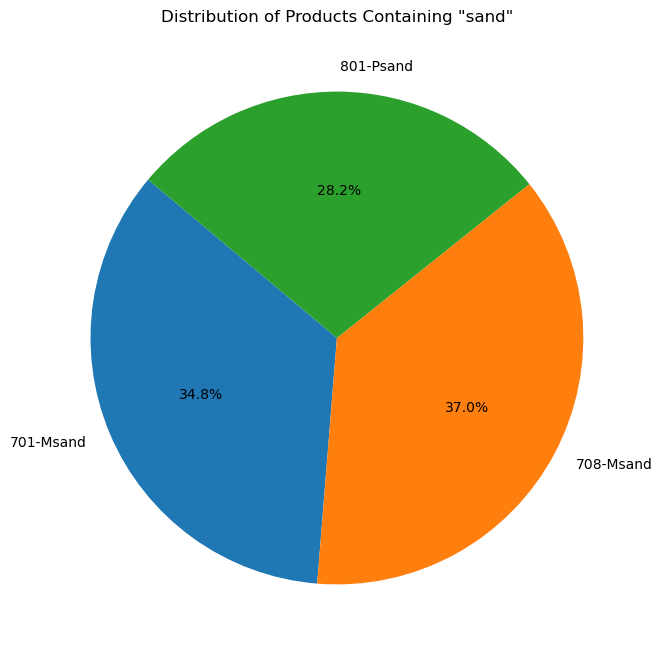

In [7]:
#Query6
query6 = """
SELECT Warehouse_productID AS ProductID,
       SUM(CurrentStock) AS TotalStock
FROM Warehouse
WHERE Warehouse_productID LIKE '%%sand%%' -- Double %% for escaping in Python strings
GROUP BY Warehouse_productID;
"""
results_df6 = pd.read_sql(query6, con=connection)
print(results_df6)


labels = results_df6['ProductID'].tolist()
sizes = results_df6['TotalStock'].tolist() 
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products Containing "sand"')
plt.show()